# Import Libraries

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
df = pd.read_csv(r"C:\Users\aloka\OneDrive\Desktop\Black_Friday\train.csv")

In [138]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [139]:
df.shape

(550068, 12)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [141]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [142]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [143]:
print((df['Product_Category_2'].isnull().sum()/len(df['Product_Category_2']))*100)
print((df['Product_Category_3'].isnull().sum()/len(df['Product_Category_2']))*100)


31.56664266963357
69.67265865311198


In [144]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(),inplace=True)
df['Product_Category_2'].isnull().sum()

0

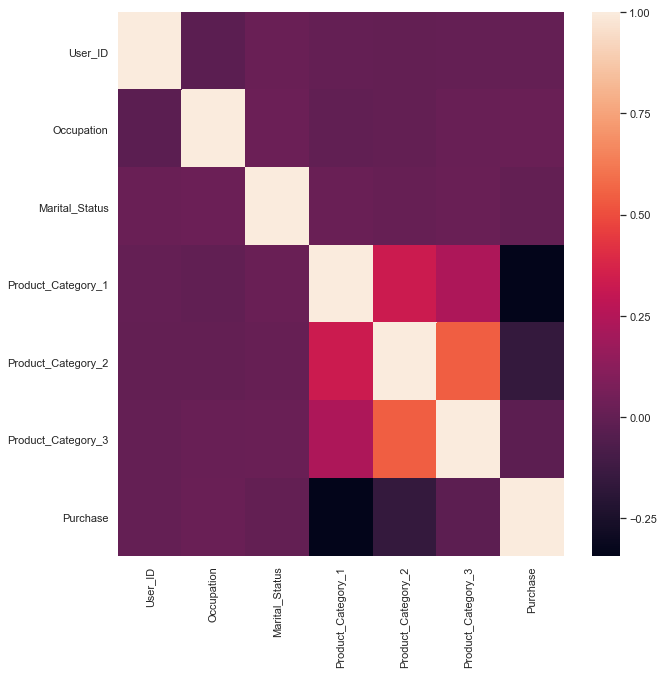

In [145]:
#plot corr matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
sns.set()

In [146]:
# Drop columns
drop_col = ['User_ID', 'Product_ID']
df.drop(drop_col,axis=1,inplace=True)

In [147]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.0,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,9.0,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,9.0,NaN,7969


In [148]:
col = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']
def find_unique(i):
    print(df[i].unique())

for y in col :
    find_unique(y)


['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]


In [149]:
from sklearn import preprocessing 

In [150]:
enc1 = preprocessing.LabelEncoder()
enc2 = preprocessing.OneHotEncoder()

In [151]:
#convert string to numerical dtype
def categ_enc(i):
    df[i]=enc1.fit_transform(df[i])
    
for x in col :
    categ_enc(x)

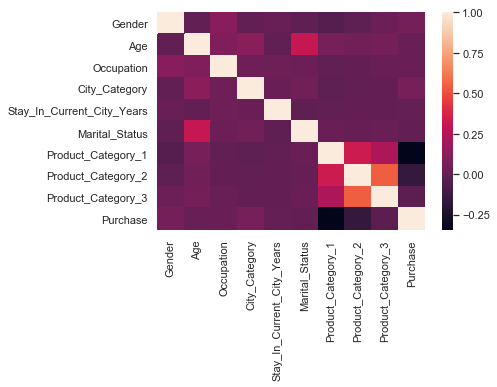

In [152]:
#Visualize corr again
sns.heatmap(df.corr())

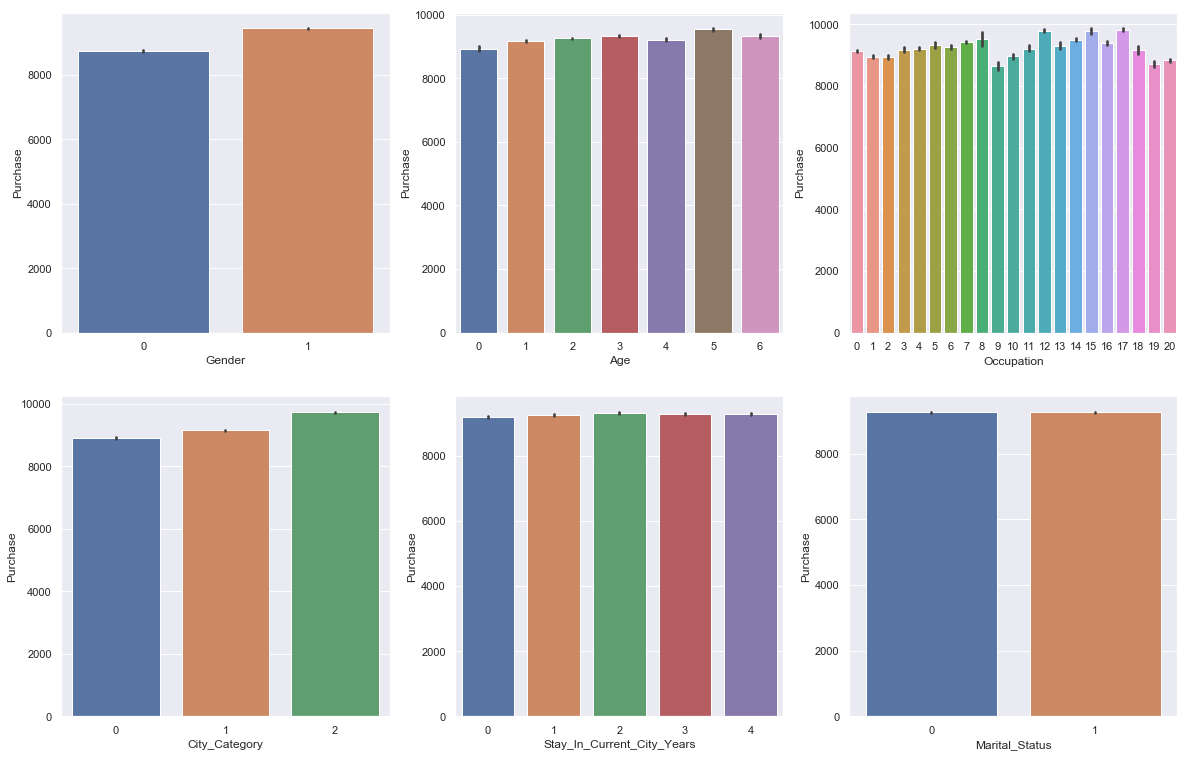

In [153]:
plt.figure(figsize=(20,20))
for i,x in enumerate (col):
    plt.subplot(3,3,i+1)
    sns.barplot(x,'Purchase',data=df)
    sns.set()
    


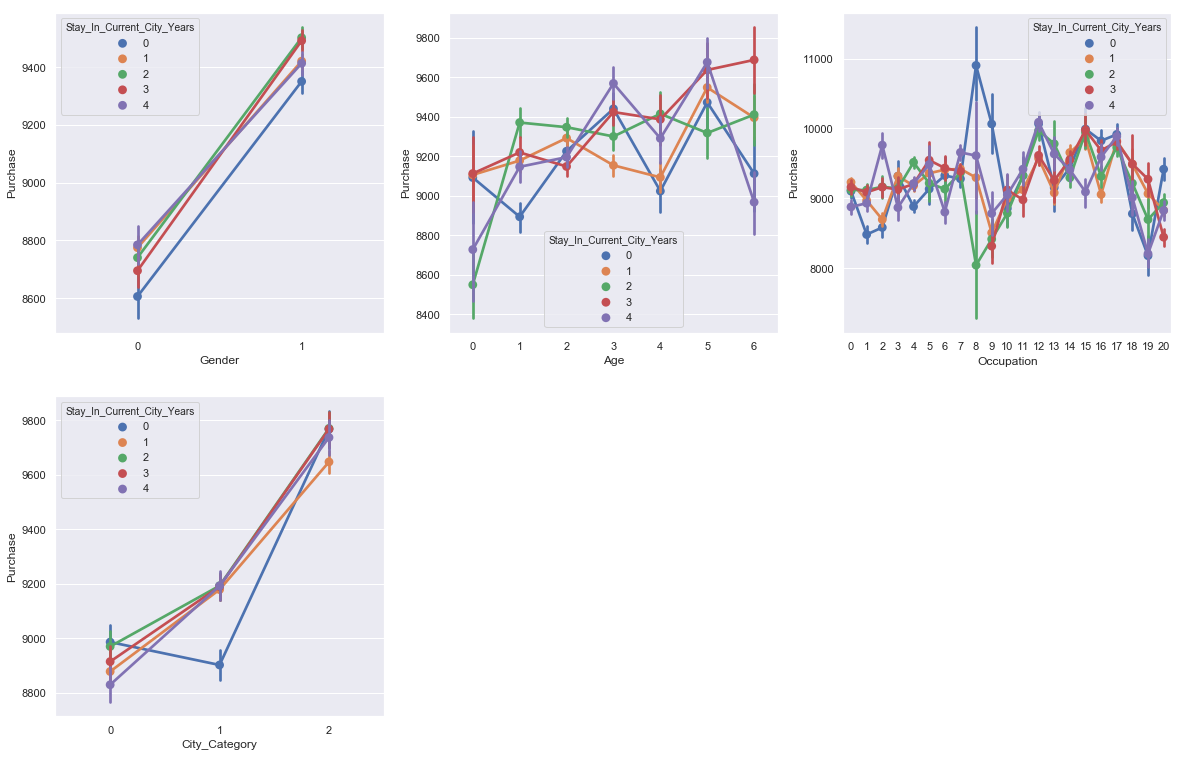

In [154]:
cat_col = ['Gender','Age','Occupation','City_Category']
plt.figure(figsize=(20,20))

for i,x in enumerate(cat_col):
    plt.subplot(3,3,i+1)
    sns.pointplot(hue='Stay_In_Current_City_Years',x=x,y='Purchase',data = df)
    sns.set()
plt.show()

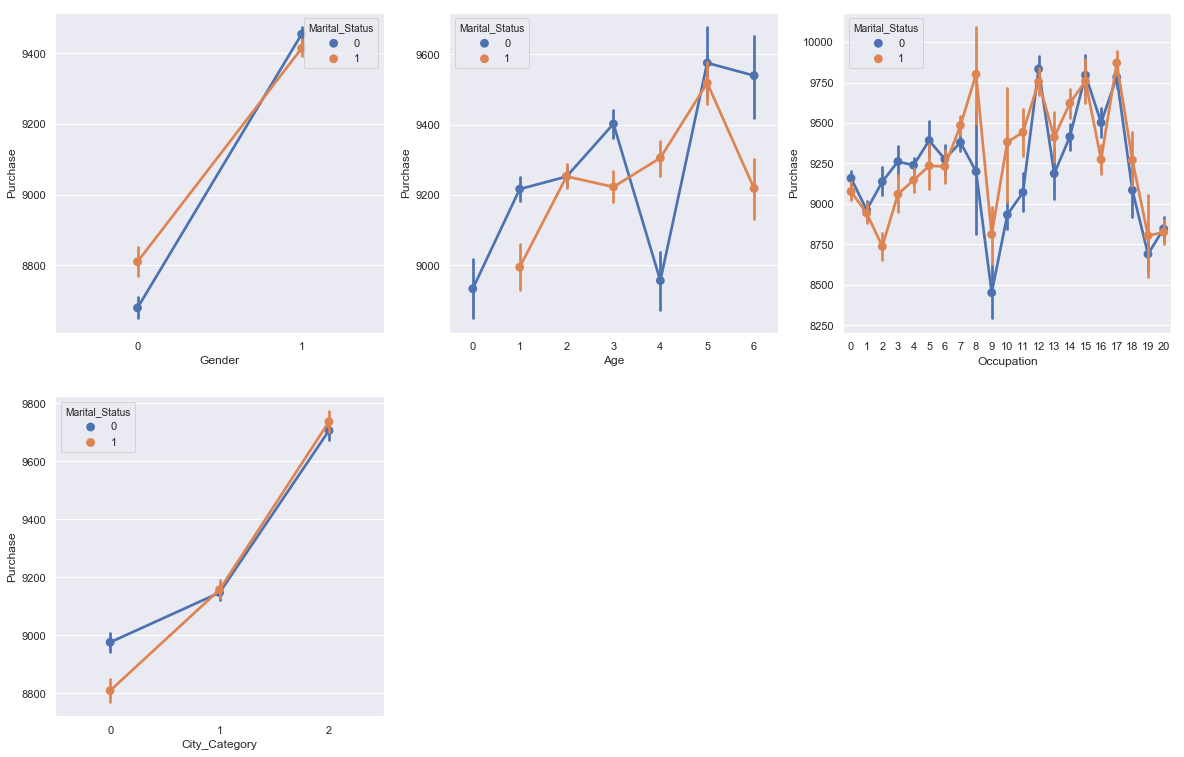

In [155]:
cat_col = ['Gender','Age','Occupation','City_Category']
plt.figure(figsize=(20,20))

for i,x in enumerate(cat_col):
    plt.subplot(3,3,i+1)
    sns.pointplot(hue='Marital_Status',x=x,y='Purchase',data = df)
    sns.set()
plt.show()

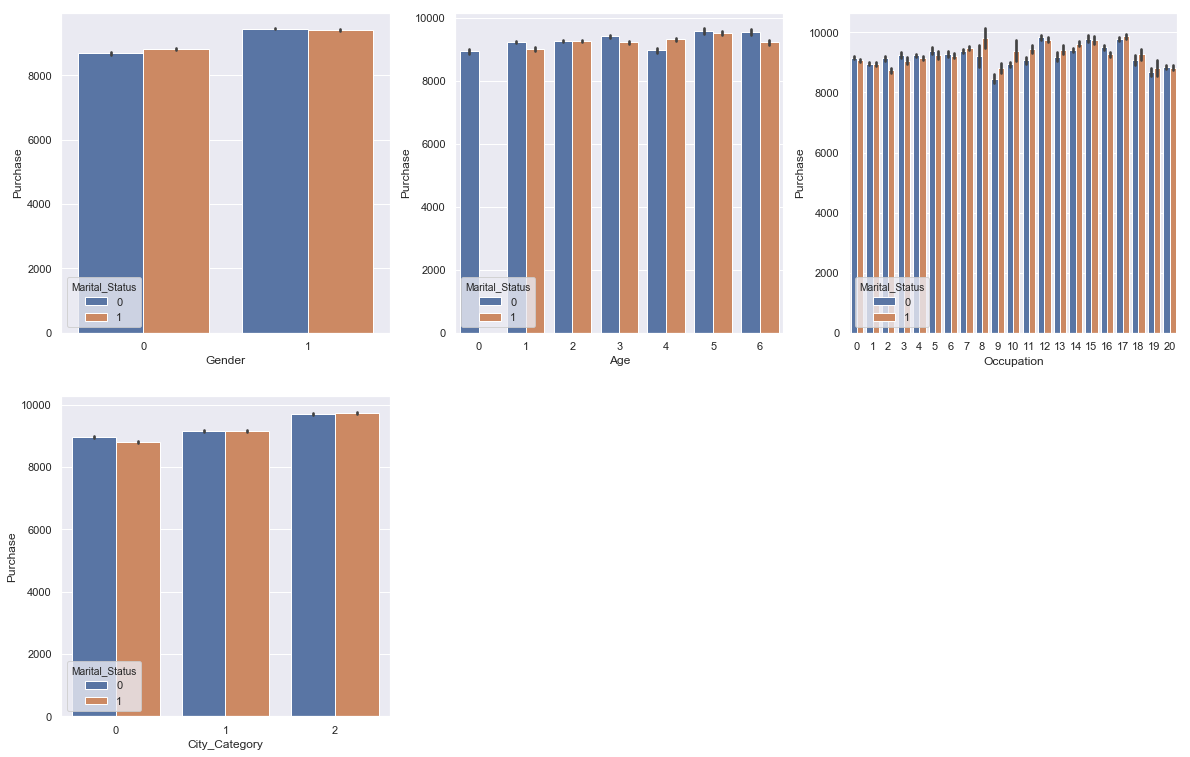

In [156]:
cat_col = ['Gender','Age','Occupation','City_Category']
plt.figure(figsize=(20,20))

for i,x in enumerate(cat_col):
    plt.subplot(3,3,i+1)
    sns.barplot(hue='Marital_Status',x=x,y='Purchase',data = df)
    sns.set()
plt.show()

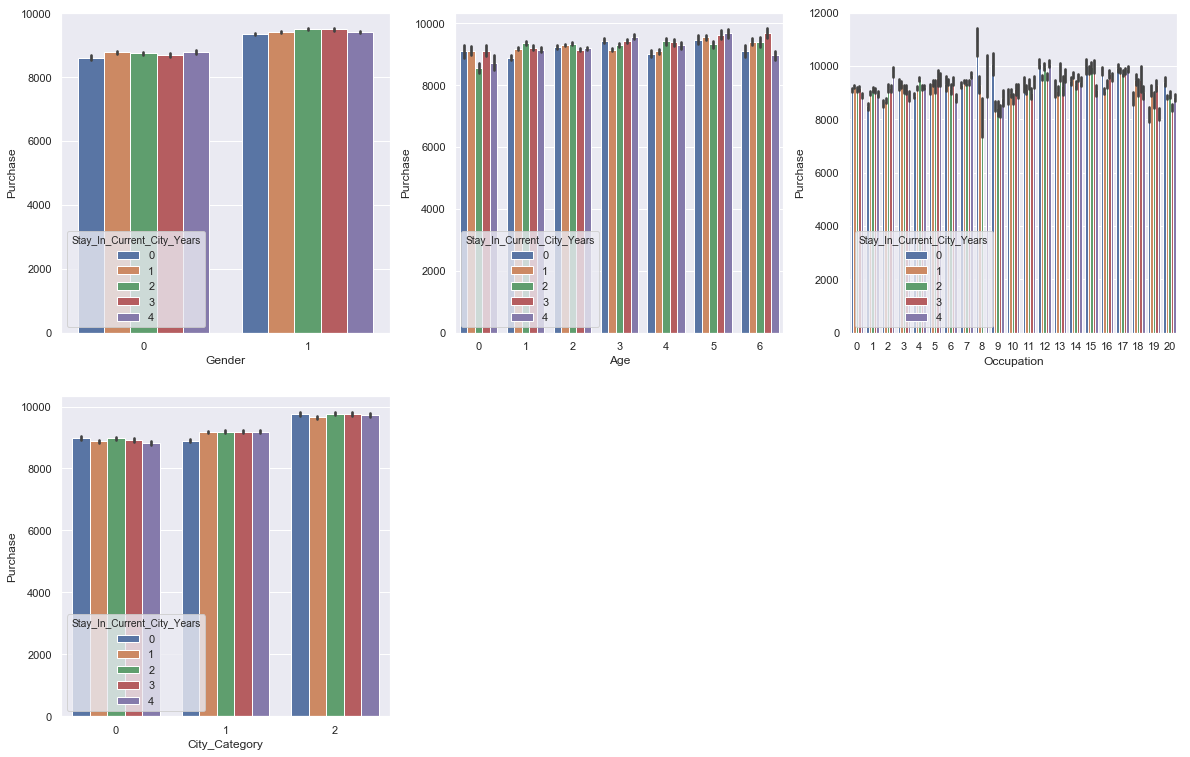

In [157]:
cat_col = ['Gender','Age','Occupation','City_Category']
plt.figure(figsize=(20,20))

for i,x in enumerate(cat_col):
    plt.subplot(3,3,i+1)
    sns.barplot(hue='Stay_In_Current_City_Years',x=x,y='Purchase',data = df)
    sns.set()
plt.show()

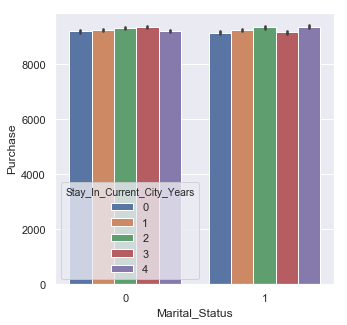

In [158]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.barplot(hue='Stay_In_Current_City_Years',x='Marital_Status',y='Purchase',data = df)
sns.set()
plt.show()

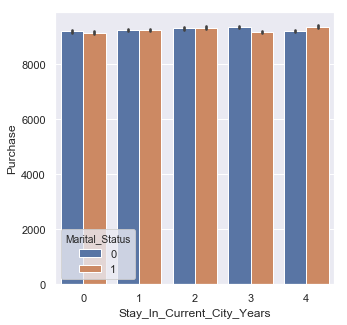

In [159]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.barplot(x='Stay_In_Current_City_Years',hue='Marital_Status',y='Purchase',data = df)
sns.set()
plt.show()

In [160]:
b = ['Product_Category_2','Product_Category_3'] #here we are making an array consisting of 2 columns namely Product_Category_2,Product_Category_3
for i in b:
    exec("df.%s.fillna(df.%s.value_counts().idxmax(), inplace=True)" %(i,i))

In [161]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.0,16.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,9.0,16.0,1422
3,0,0,10,0,2,0,12,14.0,16.0,1057
4,1,6,16,2,4,0,8,9.0,16.0,7969


<Figure size 720x720 with 0 Axes>

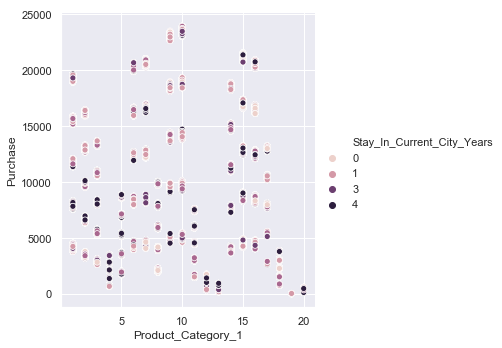

In [162]:
plt.figure(figsize=(10,10))
sns.relplot(x='Product_Category_1',y = 'Purchase',hue='Stay_In_Current_City_Years',data=df)
plt.show()

In [163]:
y = df['Purchase']
df.drop(['Purchase'],axis=1,inplace=True)


In [176]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

C:\Users\aloka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aloka\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [183]:
from sklearn.decomposition import PCA
pca = PCA(5)

In [184]:
pr_com = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.198525  , 0.1516511 , 0.12427197, 0.11173021, 0.10643882])

In [188]:
df1 = pd.DataFrame(data = pr_com, columns = ["component 1", "component 2", "component 3", "component 4","component 5"])

In [189]:
from sklearn.model_selection import KFold
kf = KFold(30)

In [190]:
for a,b in kf.split(df1):
    X_train, X_test =X[a],X[b]
    y_train, y_test = y[a],y[b]


In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [192]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
model1 = lr.fit(X_train,y_train)
model2 = dtr.fit(X_train,y_train)
model3 = rfr.fit(X_train,y_train)
model4 = gbr.fit(X_train,y_train)

C:\Users\aloka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [193]:
print("Accuracy Score of Linear regression on train set",model1.score(X_train,y_train)*100)
print("Accuracy Score of Decision Tree on train set",model2.score(X_train,y_train)*100)
print("Accuracy Score of Random Forests on train set",model3.score(X_train,y_train)*100)
print("Accuracy Score of Gradient Boosting on train set",model4.score(X_train,y_train)*100)


Accuracy Score of Linear regression on train set 11.297773267769937
Accuracy Score of Decision Tree on train set 77.8417436351891
Accuracy Score of Random Forests on train set 76.2930701919313
Accuracy Score of Gradient Boosting on train set 64.01823062338062
